### Import the Necessary Packages:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math
%matplotlib inline
import os

In [2]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

## Pandas Rows and columns configuration:

In [3]:
## set this display max columns and rows as 300,assuming max rows and columns can be 300.
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)

## Business Problem Statement: 

## Approach:


####  1. Data Cleaning

####  2. Data Blending

####  3. Data Analysis- Univariate

####  4. Data Analysis- BiVariate

####  5. Data Analysis - Multivariate

####  6. Top 10 Correlation Features.

####  7. Insights High-level Summary

###  1. Data Cleaning:
####  1.1. Read CSV Files from Dataset Directory.
####  1.2. Missing Values Identification.
####  1.3. Missing Values Elimination.
####  1.4. Irrelvant columns Elimination.
####  1.5. Data Type Conversion
####   1.6. Conversion of Negative into Positive values.

#### 1.1 Read CSV Files from Dataset directory: 

In [4]:
## read application_dataset.csv 
file_path = os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "application_data.csv")

In [5]:
file_path

'E:\\Upgrad_course\\credit-eda-git/Datasets\\application_data.csv'

In [6]:
application_dataset = pd.read_csv(file_path)

In [7]:
## see the data
application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [8]:
application_dataset.shape

(307511, 122)

In [9]:
# Finding the Total records,Column, emtries & data types:
application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [10]:
## columns in the dataset
print("Columns in the application_dataset : ", application_dataset.columns)

Columns in the application_dataset :  Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)


####  Read the previous Application Dataset: 

In [11]:
## read the previous application file as well.
previous_application_dataset = pd.read_csv(os.path.join(os.getcwd(), os.getcwd()+"/Datasets", "previous_application.csv"))

In [12]:
previous_application_dataset.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
previous_application_dataset.shape

(1670214, 37)

In [14]:
previous_application_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [15]:
## columns in the dataset
print("Columns in the Previous application_dataset : ", previous_application_dataset.columns)

Columns in the Previous application_dataset :  Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'RATE_INTEREST_PRIMARY',
       'RATE_INTEREST_PRIVILEGED', 'NAME_CASH_LOAN_PURPOSE',
       'NAME_CONTRACT_STATUS', 'DAYS_DECISION', 'NAME_PAYMENT_TYPE',
       'CODE_REJECT_REASON', 'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE',
       'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE',
       'CHANNEL_TYPE', 'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY',
       'CNT_PAYMENT', 'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION',
       'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION',
       'DAYS_LAST_DUE', 'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')


#### 1.2. Missing Values Identification:

In [16]:
def missing_value_percentage(df,threshold_to_identify):
    """
    In DataFrame,we need to convert various data types into structured one.

            Parameter(s):
            ------------
                df : DataFrame of the previous application dataset/application dataset
                threshold_to_identify : identify the missing values

            Return(s):
            ---------
                missing_value_df : Missing_value_dataframe
                
    """
    missing_value_df = pd.DataFrame(columns=["Column_Name","Missing_value_percentage"])
    for col in df.columns:
        missing_percentage = round((100*df[col].isna().sum())/(df.shape[0]),2)
        ## append each and every row and append calculated missing value field.
        missing_value_df = missing_value_df.append({"Column_Name":col,"Missing_value_percentage":missing_percentage},ignore_index=True)
    
    ## eliminate missing value percentage should be greater than threshold value
    missing_value_df = missing_value_df[missing_value_df["Missing_value_percentage"]>threshold_to_identify].sort_values(by="Missing_value_percentage",ascending=False).reset_index(drop=True)
    
    
    return missing_value_df
    

#### 1.2. Missing Values Identification for application_dataset:

In [17]:
## overall missing value percentage
missing_value_percentage(application_dataset,0.0)

,Column_Name,Missing_value_percentage
0,COMMONAREA_AVG,69.87
1,COMMONAREA_MODE,69.87
2,COMMONAREA_MEDI,69.87
3,NONLIVINGAPARTMENTS_MODE,69.43
4,NONLIVINGAPARTMENTS_AVG,69.43
5,NONLIVINGAPARTMENTS_MEDI,69.43
6,FONDKAPREMONT_MODE,68.39
7,LIVINGAPARTMENTS_MODE,68.35
8,LIVINGAPARTMENTS_MEDI,68.35
9,LIVINGAPARTMENTS_AVG,68.35


#### Observations for Application Dataset: 
#### 1.Total 64 columns has missing values out of 122 columns,we can ignore the columns whenever less than 40% percentage.
#### We have a problem if missing value percentage is greater than 40 percentage.

#### 2. Proportion of missing columns over total columns  = (64/122)*100 = 52%.
#### 3. Suggestion : Whenever missing value percentage is less than 5%, we can eliminate the records..!!

In [18]:
## greater than 40 percent missing values
missing_value_percentage(application_dataset,40.0)

,Column_Name,Missing_value_percentage
0,COMMONAREA_AVG,69.87
1,COMMONAREA_MEDI,69.87
2,COMMONAREA_MODE,69.87
3,NONLIVINGAPARTMENTS_MEDI,69.43
4,NONLIVINGAPARTMENTS_MODE,69.43
5,NONLIVINGAPARTMENTS_AVG,69.43
6,FONDKAPREMONT_MODE,68.39
7,LIVINGAPARTMENTS_MEDI,68.35
8,LIVINGAPARTMENTS_AVG,68.35
9,LIVINGAPARTMENTS_MODE,68.35


#### Observations for Application Dataset: 
#### 1.Total 49 columns has missing values out of 122 columns,we can eliminate them ,we cant do analysis witht the highest percentage values and we cant replace it.
#### 2. Final Proportion of missing columns over total columns  = (49/122)*100 = 40%.
#### 3. we eliminated 40% of the columns from the dataset and performing analysis for remaining 60% of the columns.


#### 1.3. Missing Values Elimination:

In [19]:
def missing_values_elimination(df,threshold_to_eliminate):
    """
    In DataFrame,we need to convert various data types into structured one.

            Parameter(s):
            ------------
                df : DataFrame of the previous application dataset/application dataset
                threshold_to_eliminate : Eliminate the missing values columns(missing_value_percentage>threshold) eliminate it

            Return(s):
            ---------
                final_df :  Elimination of few columns based on the threshold.
                
    """
    columns_to_drop = df.columns[df.isnull().sum() >= (threshold_to_eliminate*len(df))]
    
    print("{} columns are greater than threshold out of {} columns".format(len(columns_to_drop),len(df.columns)))    
    
    final_df = df.drop(columns_to_drop, axis = 1)
        
    print("New Columns Length:",len(final_df.columns))    

    return final_df

#### 1.3. Missing Values Elimination in Application Dataset:

In [20]:
Final_Application_dataset = missing_values_elimination(application_dataset,0.40)

49 columns are greater than threshold out of 122 columns
New Columns Length: 73


In [21]:
Final_Application_dataset.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1.2. Missing values Identification in Previous Application Dataset:

In [22]:
missing_value_percentage(previous_application_dataset,0.0)


,Column_Name,Missing_value_percentage
0,RATE_INTEREST_PRIMARY,99.64
1,RATE_INTEREST_PRIVILEGED,99.64
2,AMT_DOWN_PAYMENT,53.64
3,RATE_DOWN_PAYMENT,53.64
4,NAME_TYPE_SUITE,49.12
5,DAYS_FIRST_DRAWING,40.30
6,DAYS_FIRST_DUE,40.30
7,DAYS_LAST_DUE_1ST_VERSION,40.30
8,DAYS_LAST_DUE,40.30
9,DAYS_TERMINATION,40.30


### Observations for Previous Application Dataset: 

#### 1. As per the threshold,we can eliminate if particular column has missing value percentage greater than 40,but in previous application dataset, we have important columns will be lost for business problem statement.so increasing the threshold to 50%.
#### Important columns = ["Days_First_drawing", "days_termination","days_last_due","days_last_due_first_version","name_type_suite"]

#### 2.Total 14 columns has missing values out of 37 columns,we can ignore the columns whenever less than 50% percentage.
#### We have a problem if missing value percentage is greater than 50 percentage.

#### 3. Proportion of missing values columns over total columns  = (14/37)*100 = 37.8 %.
#### 4. Suggestion : Whenever missing value percentage is less than 5%, we can eliminate the records..!!

In [23]:
len(previous_application_dataset.columns)

37

In [24]:
missing_value_percentage(previous_application_dataset,50.0)


,Column_Name,Missing_value_percentage
0,RATE_INTEREST_PRIMARY,99.64
1,RATE_INTEREST_PRIVILEGED,99.64
2,AMT_DOWN_PAYMENT,53.64
3,RATE_DOWN_PAYMENT,53.64


#### Observations for Previous Application Dataset:

#### 1. Final Proportion of missing columns over total columns  = (4/37)*100 = 10 %.
#### 2. we eliminated 10% of the columns from the dataset and performing analysis for remaining 90% of the columns.

#### 1.3. Elimination of Missing values in previous_application_dataset: 

In [25]:
Final_Previous_Application_dataset = missing_values_elimination(previous_application_dataset,0.50)

4 columns are greater than threshold out of 37 columns
New Columns Length: 33


In [26]:
Final_Previous_Application_dataset.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### 1.4. Irrelevant columns Identification and Elimination:
#### Purpose : We have a lots of columns in the dataset,eliminate the unnecessary columns in both datasets.

In [27]:
unnecessary_columns_application_dataset = ['FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL',
                      'REGION_RATING_CLIENT_W_CITY', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE',
                      'FLAG_DOCUMENT_2','REG_REGION_NOT_LIVE_REGION','REG_REGION_NOT_WORK_REGION',
                      'LIVE_REGION_NOT_WORK_REGION','FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4','FLAG_DOCUMENT_5',
                      'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7','FLAG_DOCUMENT_8','FLAG_DOCUMENT_9','FLAG_DOCUMENT_10',
                      'FLAG_DOCUMENT_11','FLAG_DOCUMENT_12','FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
                      'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_18',
                      'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21',
                       'EXT_SOURCE_2', 'EXT_SOURCE_3']

### Reasons for Irrelevant columns : 

####  External sources:
#### 1.These columns are irreleveant because it has the information collected from the external data,since we dont know the exact source from this data collected we cannot get any meaningful insights from them.
#### Flag Documents:
#### 2.Flag documents are the various types of documents provided by customer , since we dont know what types of documents provided by the customer, we can eliminate them completely.
#### Apartment Variables:
#### 3.These are the normalized information from the external source.These might not be helpful in analysis with target variable. 
   
#### Note: I am not eliminating these columns from the original dataset..!!


In [28]:
Final_Application_dataset = Final_Application_dataset.drop(columns=unnecessary_columns_application_dataset,axis=1)


#### Irrelevant columns in previous application dataset:

In [29]:
Final_Previous_Application_dataset.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS', 'DAYS_DECISION',
       'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON', 'NAME_TYPE_SUITE',
       'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY', 'NAME_PORTFOLIO',
       'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE', 'SELLERPLACE_AREA',
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

### 1.5. Data Types Conversion:

In [30]:
def data_types_conversion(df,string_columns):
    """
    In DataFrame,we need to convert various data types into structured one.

            Parameter(s):
            ------------
                df : DataFrame 
                few_columns : For Few columns,we need to convert them into str

            Return(s):
            ---------
                final_df :  Final Proper Dataframes should be mapped
                
    """
    ## identify the categorical columns
    categorical_columns = df.select_dtypes(include=["bool","object","category"]).columns
    
    ## identify the numerical columns 
    numerical_columns = df.select_dtypes(include=["number"]).columns
    
    df[categorical_columns] = df[categorical_columns].astype("category")
    
    df[numerical_columns] = df[numerical_columns].apply(pd.to_numeric, errors='coerce')
    
    ## using the above function as well,need to convert few data types should be converted to string
    df[string_columns] = df[string_columns].astype(str)
    
   
    return df

#### Data Types Conversion for application dataset:

In [31]:
## data types
Final_Application_dataset = data_types_conversion(Final_Application_dataset,
                                                  string_columns=["SK_ID_CURR","TARGET"])

In [32]:
## check whether data types is properly mapped or not 
Final_Application_dataset.dtypes

SK_ID_CURR                      object
TARGET                          object
NAME_CONTRACT_TYPE            category
CODE_GENDER                   category
FLAG_OWN_CAR                  category
FLAG_OWN_REALTY               category
CNT_CHILDREN                     int64
AMT_INCOME_TOTAL               float64
AMT_CREDIT                     float64
AMT_ANNUITY                    float64
AMT_GOODS_PRICE                float64
NAME_TYPE_SUITE               category
NAME_INCOME_TYPE              category
NAME_EDUCATION_TYPE           category
NAME_FAMILY_STATUS            category
NAME_HOUSING_TYPE             category
REGION_POPULATION_RELATIVE     float64
DAYS_BIRTH                       int64
DAYS_EMPLOYED                    int64
DAYS_REGISTRATION              float64
DAYS_ID_PUBLISH                  int64
FLAG_MOBIL                       int64
OCCUPATION_TYPE               category
CNT_FAM_MEMBERS                float64
REGION_RATING_CLIENT             int64
WEEKDAY_APPR_PROCESS_STAR

#### Data Types Conversion in Previous Application Dataset:

In [33]:
Final_Previous_Application_dataset = data_types_conversion(Final_Previous_Application_dataset,string_columns=["SK_ID_CURR","SK_ID_PREV"])

In [34]:
Final_Previous_Application_dataset.dtypes

SK_ID_PREV                       object
SK_ID_CURR                       object
NAME_CONTRACT_TYPE             category
AMT_ANNUITY                     float64
AMT_APPLICATION                 float64
AMT_CREDIT                      float64
AMT_GOODS_PRICE                 float64
WEEKDAY_APPR_PROCESS_START     category
HOUR_APPR_PROCESS_START           int64
FLAG_LAST_APPL_PER_CONTRACT    category
NFLAG_LAST_APPL_IN_DAY            int64
NAME_CASH_LOAN_PURPOSE         category
NAME_CONTRACT_STATUS           category
DAYS_DECISION                     int64
NAME_PAYMENT_TYPE              category
CODE_REJECT_REASON             category
NAME_TYPE_SUITE                category
NAME_CLIENT_TYPE               category
NAME_GOODS_CATEGORY            category
NAME_PORTFOLIO                 category
NAME_PRODUCT_TYPE              category
CHANNEL_TYPE                   category
SELLERPLACE_AREA                  int64
NAME_SELLER_INDUSTRY           category
CNT_PAYMENT                     float64


In [35]:
Final_Previous_Application_dataset.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


#### Observations:
#### 1. Since no.of.days first drawing,last due cant be float, but we have missing values so conversion of float will not occur any major impact on analysis.

#### 1.6. Negative Values to Positive values conversion:

#### Purpose:
#### 1.Since Days birth,Days Employed cant be negative,so need to convert them into positive in application Dataset.


In [36]:
Final_Application_dataset[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]] = Final_Application_dataset[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH"]].apply(lambda x: abs(x),axis=1)


#### 2. Data Blending:
#### 2.1 Identify the common columns in both datasets.
#### 2.2 Blend the both datasets with application dataset.

### 2.1 Identify the common columns in both datasets:

In [37]:
columns = pd.merge(pd.DataFrame(Final_Application_dataset.columns),pd.DataFrame(Final_Previous_Application_dataset.columns),how="inner")

In [38]:
columns

,0
0,SK_ID_CURR
1,NAME_CONTRACT_TYPE
2,AMT_CREDIT
3,AMT_ANNUITY
4,AMT_GOODS_PRICE
5,NAME_TYPE_SUITE
6,WEEKDAY_APPR_PROCESS_START
7,HOUR_APPR_PROCESS_START


In [39]:
merged_df = pd.merge(Final_Application_dataset,Final_Previous_Application_dataset , how = 'left' , on = 'SK_ID_CURR' , suffixes = ('_current' , '_previous'))
merged_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_current,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_current,AMT_ANNUITY_current,AMT_GOODS_PRICE_current,NAME_TYPE_SUITE_current,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START_current,HOUR_APPR_PROCESS_START_current,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_PREV,NAME_CONTRACT_TYPE_previous,AMT_ANNUITY_previous,AMT_APPLICATION,AMT_CREDIT_previous,AMT_GOODS_PRICE_previous,WEEKDAY_APPR_PROCESS_START_previous,HOUR_APPR_PROCESS_START_previous,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_previous,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461.0,637.0,3648.0,2120.0,1,Laborers,1.0,2,WEDNESDAY,10,0,0,0,Business Entity Type 3,2.0,2.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,1038818,Consumer loans,9251.775,179055.0,179055.0,179055.0,SATURDAY,9.0,Y,1.0,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,Core staff,2.0,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1810518,Cash loans,98356.995,900000.0,1035882.0,900000.0,FRIDAY,12.0,Y,1.0,XNA,Approved,-746.0,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1.0,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,Core staff,2.0,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2636178,Consumer loans,64567.665,337500.0,348637.5,337500.0,SUNDAY,17.0,Y,1.0,XAP,Approved,-828.0,Cash through the bank,XAP,Family,Refreshed,Furniture,POS,XNA,Stone,1400.0,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765.0,1188.0,1186.0,291.0,1,Core staff,2.0,1,MONDAY,11,0,0,0,School,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2396755,Consumer loans,6737.310,68809.5,68053.5,68809.5,SATURDAY,15.0,Y,1.0,XAP,Approved,-2341.0,Cash through the bank,XAP,Family,Refreshed,Consumer Electronics,POS,XNA,Country-wide,200.0,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046.0,225.0,4260.0,2531.0,1,Laborers,1.0,2,MONDAY,9,0,0,0,Government,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1564014,Consumer loans,5357.250,24282.0,20106.0,24282.0,FRIDAY,5.0,Y,1.0,XAP,Approved,-815.0,Cash through the bank,XAP,Unaccompanied,New,Mobile,POS,X

In [40]:
merged_df.shape

(1430155, 73)

### 2. Data Analysis- Univariate: 
#### 2.1 Univariate Analysis for Categorical Columns
#### 2.2 Univariate Analysis for Numerical columns and Bins/segmentation.

#### Univariate Data Analysis in Application Dataset:

In [41]:
def numerical_categorical_columns(df,operations):
    
    if operations==["bool","object","category"]:
        
        categorical_columns = df.select_dtypes(include=["bool","object","category"]).columns
        
        return categorical_columns
    else:
        
        numerical_columns = df.select_dtypes(include=["number"]).columns
        
        return numerical_columns


In [42]:
categorical_columns = numerical_categorical_columns(Final_Application_dataset,["bool","object","category"])

In [43]:
categorical_columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE', 'WEEKDAY_APPR_PROCESS_START',
       'ORGANIZATION_TYPE'],
      dtype='object')

In [44]:
print("Total {} columns are categorical out of {}".format(len(categorical_columns),len(Final_Application_dataset.columns)))

Total 14 columns are categorical out of 41


## Validate the Categorical columns data:

In [45]:
Final_Application_dataset[numerical_categorical_columns(Final_Application_dataset,["bool","object","category"])].head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE
0,100002,1,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
1,100003,0,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School
2,100004,0,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government
3,100006,0,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3
4,100007,0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion


In [268]:
df_0=Final_Application_dataset[Final_Application_dataset.TARGET==0]    
df_1=Final_Application_dataset[Final_Application_dataset.TARGET==1]

#### Target Variable Percentage and Imbalance Percentage:

In [284]:
def univariate_barchart(df,column_name,title):  
    plt.style.use('ggplot')
    sns.despine
    
    df = Final_Application_dataset.groupby(column_name).agg({column_name:"count"})
    df["total_sum"] = df[column_name].sum()
    df["percentage"] = (df[column_name]/df["total_sum"])*100
    df = df.rename(columns={column_name:"individual_count"}).reset_index()
        
    sns.set_style("whitegrid")
    bar,(ax1) = plt.subplots(1,1,figsize=(10,6))
    sns.barplot(x=column_name, y='percentage', data=df, ci=None, palette="muted",orient='v',ax=ax1 )
    ax1.set_title(title, fontsize=15)
    ax1.set_xlabel ("Distribution of "+ column_name + "Variable")
    ax1.set_ylabel ("Percentage Of "+ column_name + "Variable")
    # calculate the percentages and annotate the sns barplot
    for rect in ax1.patches:
        ax1.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%.1f%%"% rect.get_height(), weight='bold' )

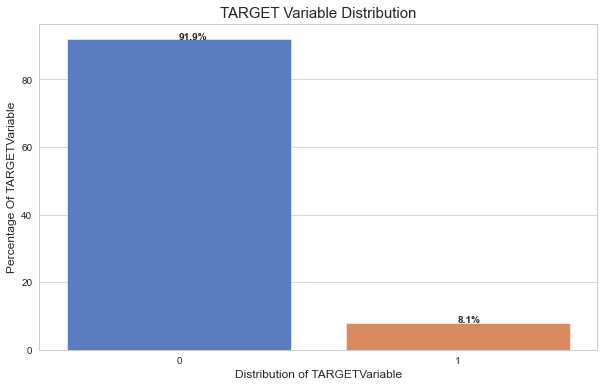

In [285]:
univariate_barchart(Final_Application_dataset,"TARGET","TARGET Variable Distribution")

#### Insights:

### Dataset Split with respect to target Variable: 

In [295]:
df_0=Final_Application_dataset[Final_Application_dataset.TARGET=="0"]   
df_1=Final_Application_dataset[Final_Application_dataset.TARGET=="1"]   

In [315]:
def univanal(var):
    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.countplot(x=var, data=df_0,ax=ax1)
    ax1.set_ylabel('Total Counts')
    ax1.set_title(f'Distribution of {var} for Non-Defaulters',fontsize=15)
    ax1.set_xticklabels(ax1.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/len(df_0))*100), (p.get_x()+0.1, p.get_height()+50))
        
    sns.countplot(x=var, data=df_1,ax=ax2)
    ax2.set_ylabel('Total Counts')
    ax2.set_title(f'Distribution of {var} for Defaulters',fontsize=15)    
    ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    # Adding the normalized percentage for easier comparision between defaulter and non-defaulter
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/len(df_1))*100), (p.get_x()+0.1, p.get_height()+50))
    
    plt.show()

### Code Gender:
#### 1. Overall Distribution in the dataset with respective to target variable.
#### 2. Overall Distribution with respective to target variable.

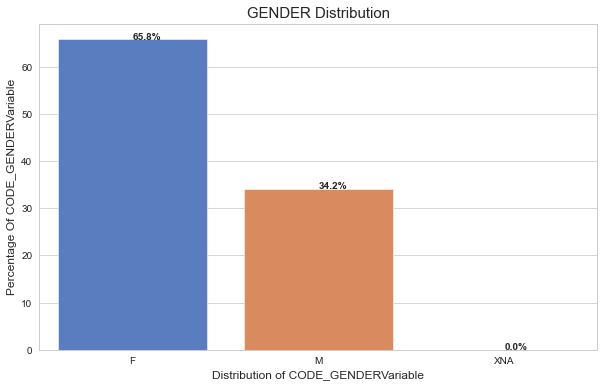

In [316]:
univariate_barchart(Final_Application_dataset,"CODE_GENDER","GENDER Distribution")

#### Overall Distribution with respective to target variable:

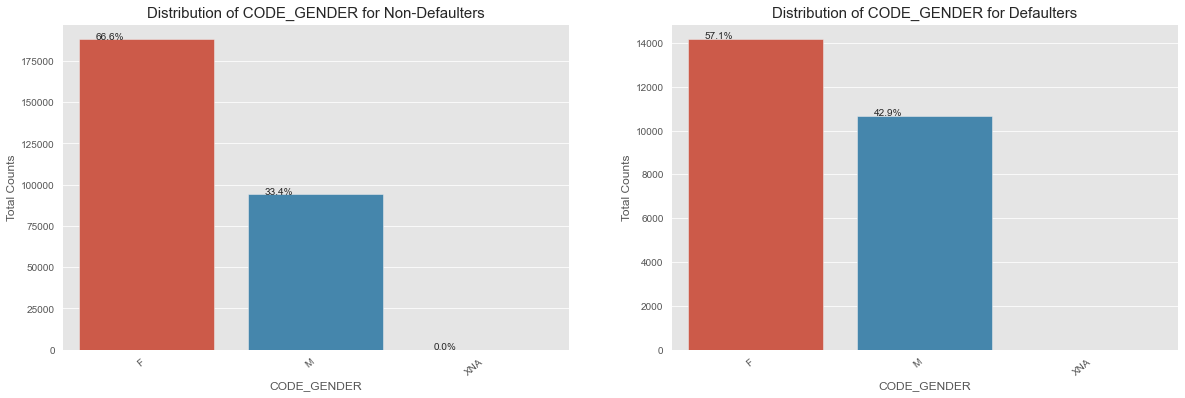

In [317]:
univanal("CODE_GENDER")

#### Insights:

#### NAME_CONTRACT_TYPE:

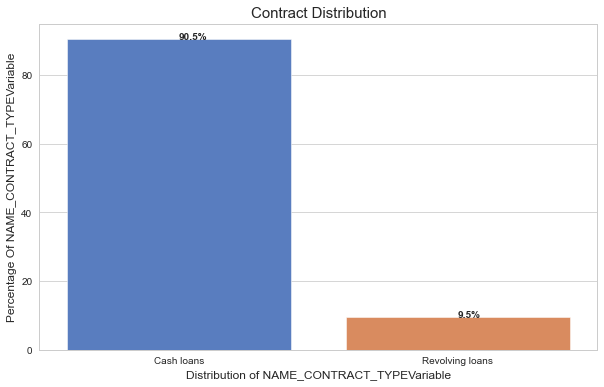

In [301]:
univariate_barchart(Final_Application_dataset,"NAME_CONTRACT_TYPE","Contract Distribution")

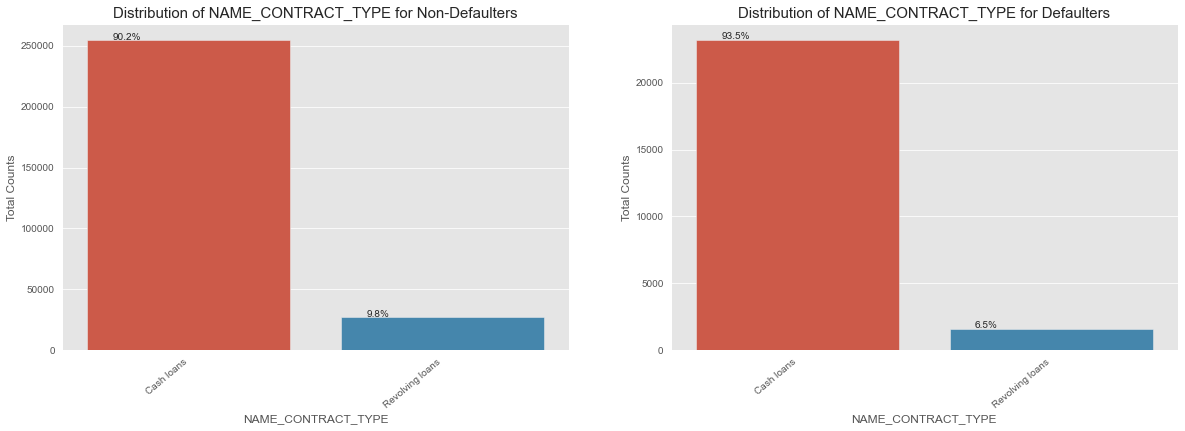

In [302]:
univanal("NAME_CONTRACT_TYPE")